# Account study

The purpose of this study is to find useful information about the accounts that over the months, have published information about the covid vaccine in Italy.

More precisely, the idea is to identify "important" noVax accounts, that is very present in the dataset, that in the course of this notebook I will call "suspicious accounts".

A person will be identified as "noVax" is, according to [treccani](https://www.treccani.it/vocabolario/antivaccinismo_res-5b408ba3-8991-11e8-a7cb-00271042e8d9_%28Neologismi%29/#:~:text=antivaccinismo%20s.%20m.%20Convinzione%20e%20posizione,popolazione%20infantile%20alla%20profilassi%20vaccinale.&text=Derivato%20dal%20s.%20m.%20vaccino2,1%20e%20del%20suffisso%20%2Dismo), "Conviction and position of those who are against vaccination and, in particular, the fact of subjecting the infant population to vaccine prophylaxis".

## Import

In [1]:
import pandas as pd
import numpy as np
import json
from collections import Counter

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../2_Account_study')
sys.path.insert(0, '../')
import account_util as ut
import general_utils as gen_ut

## Dataset preparation

In [2]:
df = pd.read_csv('../tweets.csv',low_memory=False,
                 usecols=['user_id','user_created_at','user_screen_name','user_mentions','created_at','user_verified',
                         'user_url_cred','rt_created_at','quoted_status_id','in_reply_to_user_id',
                          'in_reply_to_screen_name','rt_user_screen_name','is_self_rt'])


### Getting only first generation novax and provax

In [3]:
data = pd.read_csv('../1_Dataset_preparation/listControlledUsers.csv')  
listNovax = list(data[data['malicious']].iloc[:,0])
listLinkLow = list(data[data['linkLow']].iloc[:,0])
listProvax = list(data[data['benevolent']].iloc[:,0])

In [4]:
df_novax = df[np.in1d(df['user_screen_name'], listNovax)].copy()
df_provax = df[np.in1d(df['user_screen_name'], listProvax)].copy()

In [5]:
df_novax['user_created_at'] = pd.to_datetime(df_novax['user_created_at'], format="%a %b %d %X %z %Y")
df_novax['created_at'] = pd.to_datetime(df_novax['created_at'], format="%a %b %d %X %z %Y")

df_provax['user_created_at'] = pd.to_datetime(df_provax['user_created_at'], format="%a %b %d %X %z %Y")
df_provax['created_at'] = pd.to_datetime(df_provax['created_at'], format="%a %b %d %X %z %Y")

In [6]:
dfAccount_novax = pd.DataFrame()

df1 = df_novax.groupby(['user_screen_name']).sum()
df1.loc[:,df1.columns[df1.columns.str.contains('id', regex=False)==False]]

dfAccount_novax['user_verified'] = df1['user_verified']>0 
dfAccount_novax['created_at'] = df_novax.groupby('user_screen_name').first()['user_created_at']

In [7]:
dfAccount_provax = pd.DataFrame()

df1 = df_provax.groupby(['user_screen_name']).sum()
df1.loc[:,df1.columns[df1.columns.str.contains('id', regex=False)==False]]

dfAccount_provax['user_verified'] = df1['user_verified']>0 
dfAccount_provax['created_at'] = df_provax.groupby('user_screen_name').first()['user_created_at']

### General info study

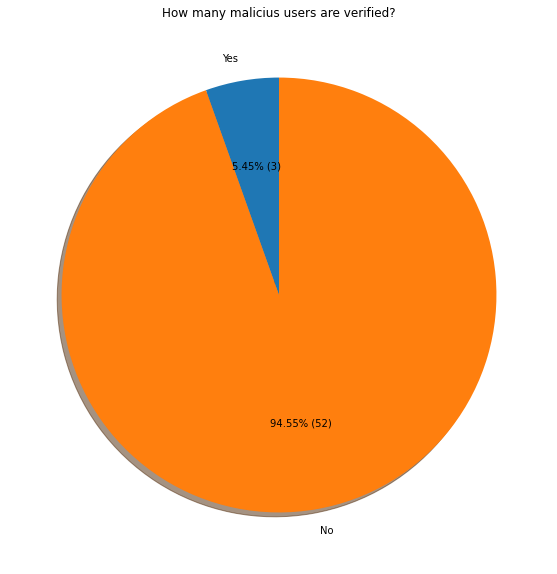

'Total users: 55'

In [8]:
#How many users verify the account (only for novax) --> provax are for sure verified
values = [sum(dfAccount_novax['user_verified']), len(dfAccount_novax) - sum(dfAccount_novax['user_verified'])]
names = ['Yes', 'No']

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(values, labels=names, autopct=lambda p:f'{p:.2f}% ({p*sum(values)/100 :,.0f})'.replace(',', '\''),
        shadow=True, startangle=90)

plt.title("How many malicius users are verified?")
plt.show()
"Total users: {:,}".format(len(dfAccount_novax)).replace(',', '\'')

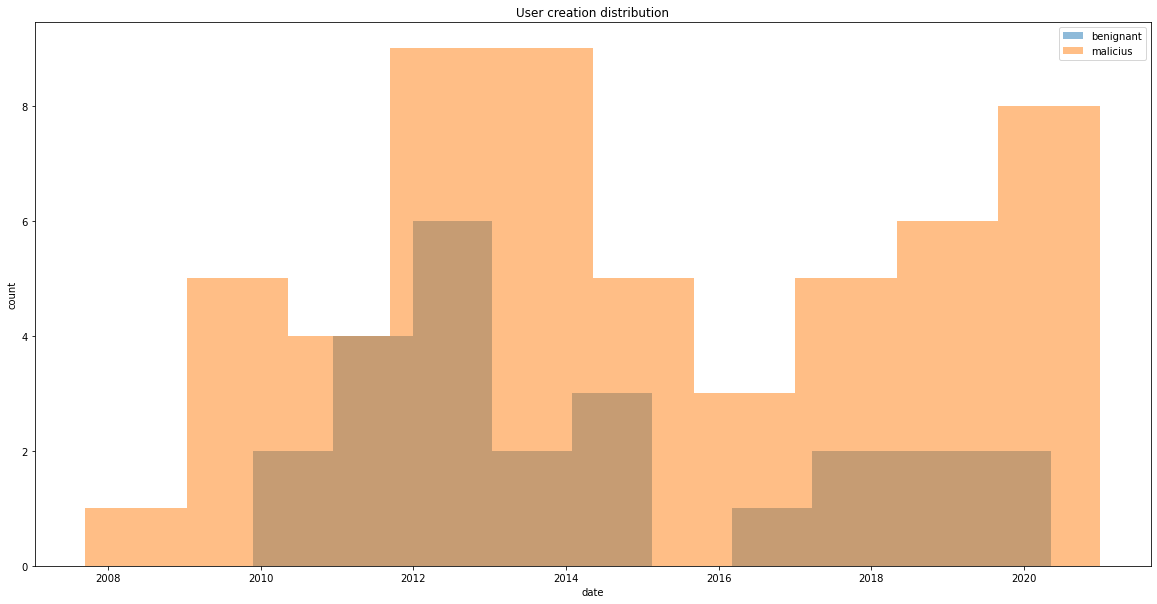

In [9]:
#User creation distribution
plt.figure(figsize=(20,10))
plt.hist(dfAccount_provax["created_at"],alpha=0.5,label='benignant')
plt.hist(dfAccount_novax["created_at"],alpha=0.5,label='malicius')


plt.xlabel('date')
plt.ylabel('count')
plt.title('User creation distribution')
plt.legend()
plt.show()

### General study (tweet, retweet, replies)

### All type of posts

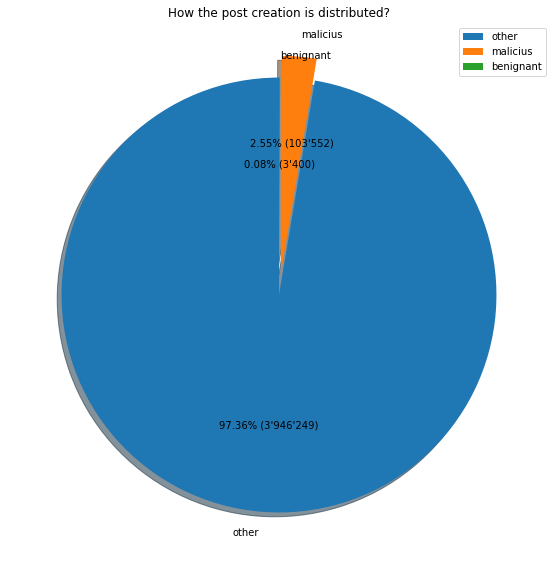

In [10]:
values = [len(df)-len(df_novax)-len(df_provax),len(df_novax),len(df_provax)]
names = ['other', 'malicius', 'benignant']

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(values, labels=names, autopct=lambda p:f'{p:.2f}% ({p*sum(values)/100 :,.0f})'.replace(',', '\''),
        shadow=True, startangle=90,explode = [0.0,0.1,0.0])

plt.title("How the post creation is distributed?")
plt.legend()
plt.show()

### All type of posts

In [11]:
#Perparation i df grouped by name
dfTweetByName_novax = pd.DataFrame(df_novax.loc[:,'user_screen_name'])
dfTweetByName_novax = ut.get_df_raggruped(dfTweetByName_novax,'tweet_count','user_screen_name')
dfTweetByName_novax = ut.add_user_type(dfTweetByName_novax,listNovax,listProvax,listLinkLow)
dfTweetByName_novax

,tweet_count,user_type
user_screen_name,,
Piero42395724,4803,Novax
IacobellisT,4333,Novax
Pietro_Otto,4123,Novax
TommyBrain,4115,Novax
Z3r0Rules,4081,Novax
xenonian1,4007,Novax
MarySpes,3815,Novax
marchesaangeli,3788,Novax
manu_etoile,3522,Novax


In [12]:
#Perparation i df grouped by name
dfTweetByName_provax = pd.DataFrame(df_provax.loc[:,'user_screen_name'])
dfTweetByName_provax = ut.get_df_raggruped(dfTweetByName_provax,'tweet_count','user_screen_name')
dfTweetByName_provax = ut.add_user_type(dfTweetByName_provax,listNovax,listProvax,listLinkLow)
dfTweetByName_provax

,tweet_count,user_type
user_screen_name,,
Cartabellotta,878,Provax
RobertoBurioni,734,Provax
GIMBE,290,Provax
ScaltritiLab,227,Provax
GiacomoGorini,221,Provax
BiologiScienza,170,Provax
MedBunker,142,Provax
DrMCecconi,135,Provax
WRicciardi,116,Provax


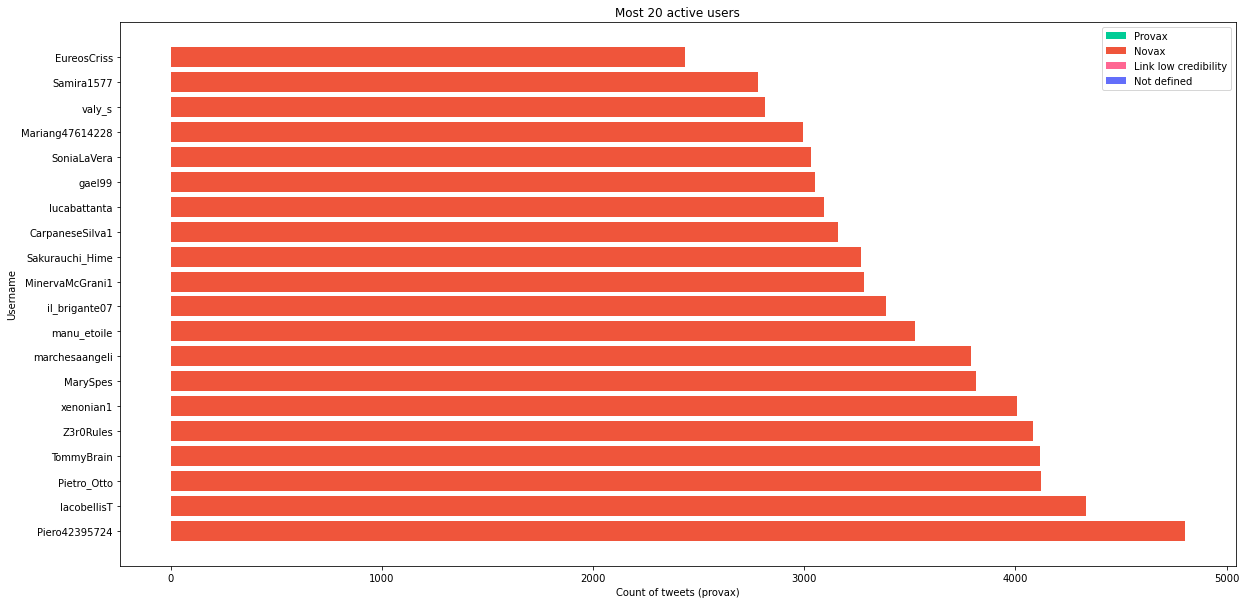

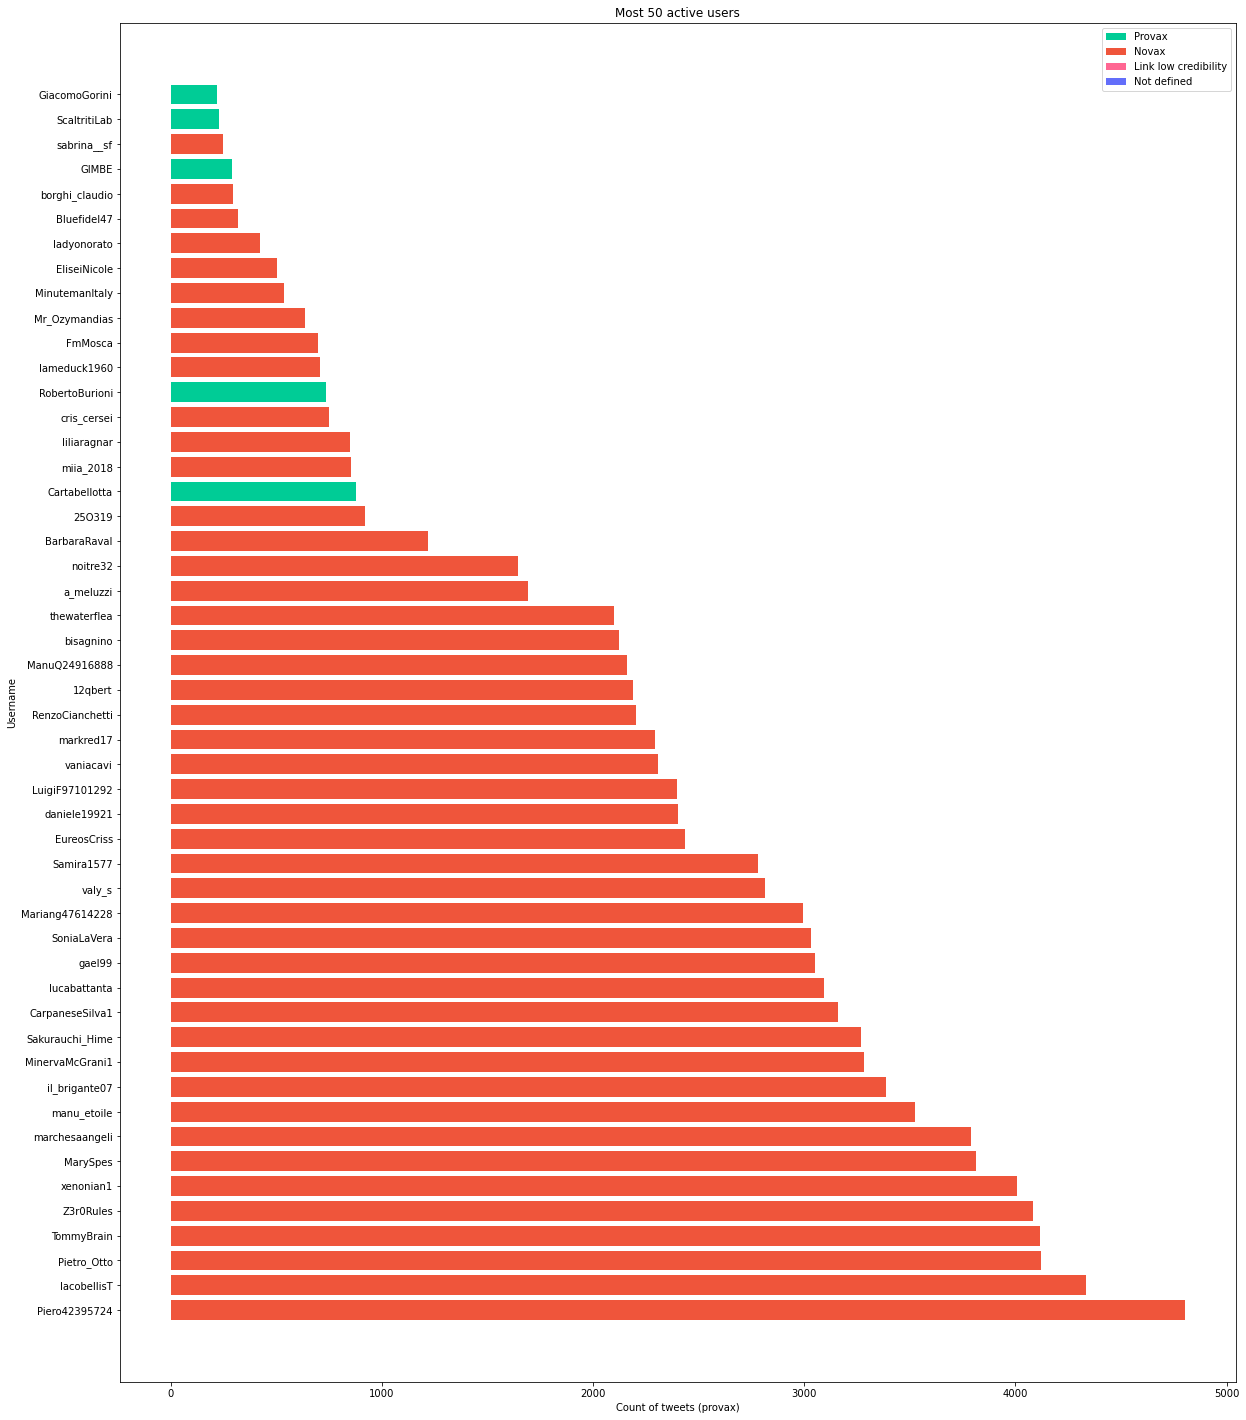

In [13]:
#Show the most active user (in general)
dfTweetByName = dfTweetByName_provax.append(dfTweetByName_novax)
dfTweetByName=dfTweetByName.sort_values(by='tweet_count',ascending=False)
for i in (20,50):
    ut.print_histogram_users(dfTweetByName,i,'tweet_count','Most %d active users'%i,'Count of tweets')

### Separete post study

In [14]:
tweets_novax,retweet_novax,reply_novax,quotes_novax = gen_ut.separate_post_type(df_novax)
tweets_provax,retweet_provax,reply_provax,quotes_provax = gen_ut.separate_post_type(df_provax)

#### Tweet study

In [17]:
# get top 20 most frequent Tweet account
df_tweets = ut.get_df_raggruped(tweets_provax.append(tweets_novax),'tweet_count','user_screen_name')
df_tweets = ut.add_user_type(df_tweets,listNovax,listProvax,listLinkLow)
df_tweets

,user_verified,is_self_rt,user_url_cred,tweet_count,user_type
user_screen_name,,,,,
IacobellisT,False,False,152.56,3814.0,Novax
TommyBrain,False,False,172.50,3450.0,Novax
bisagnino,False,False,256.36,1972.0,Novax
noitre32,False,False,201.96,594.0,Novax
EliseiNicole,False,False,267.96,462.0,Novax
...,...,...,...,...,...
thewaterflea,False,False,2.32,4.0,Novax
ProfLopalco,False,False,0.00,3.0,Provax
GIMBE,False,False,2.00,2.0,Provax


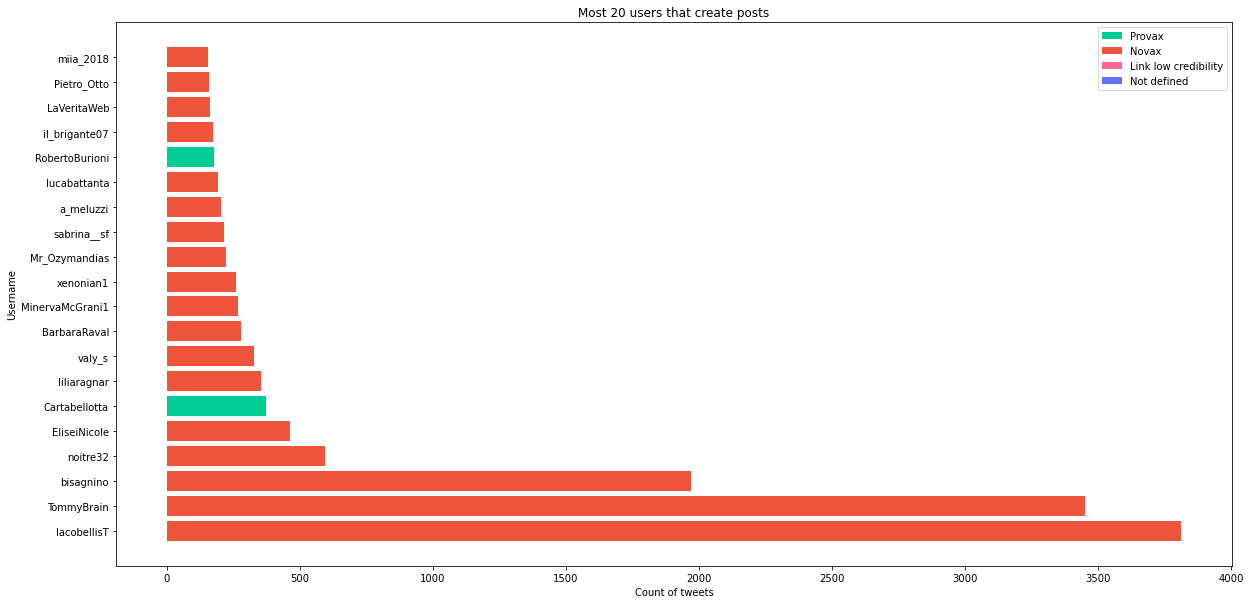

In [18]:
ut.print_histogram_users(df_tweets,20,'tweet_count','Most %d users that create posts'%20,'Count of tweets')

#### Retweet study

In [21]:
df_retweet_novax = pd.DataFrame()
df_retweet_novax['all_rt']  = retweet_novax.groupby('rt_user_screen_name').count()['user_id']
df_retweet_novax['self_rt'] = retweet_novax.groupby('rt_user_screen_name').sum()['is_self_rt']
df_retweet_novax['real_rt'] = df_retweet_novax['all_rt'] - df_retweet_novax['self_rt']
df_retweet_novax.sort_values('real_rt',ascending=False,inplace=True)

df_retweet_novax = ut.add_user_type(df_retweet_novax,listNovax,listProvax,listLinkLow)
df_retweet_novax

,all_rt,self_rt,real_rt,user_type
rt_user_screen_name,,,,
MinervaMcGrani1,2496,0,2496,Novax
BarbaraRaval,1645,35,1610,Novax
valy_s,1535,1,1534,Novax
noitre32,1066,0,1066,Novax
ImolaOggi,1025,0,1025,Not defined
...,...,...,...,...
SalvoInUK,1,0,1,Not defined
SamaRosa70,1,0,1,Not defined
zuhura05,1,0,1,Not defined


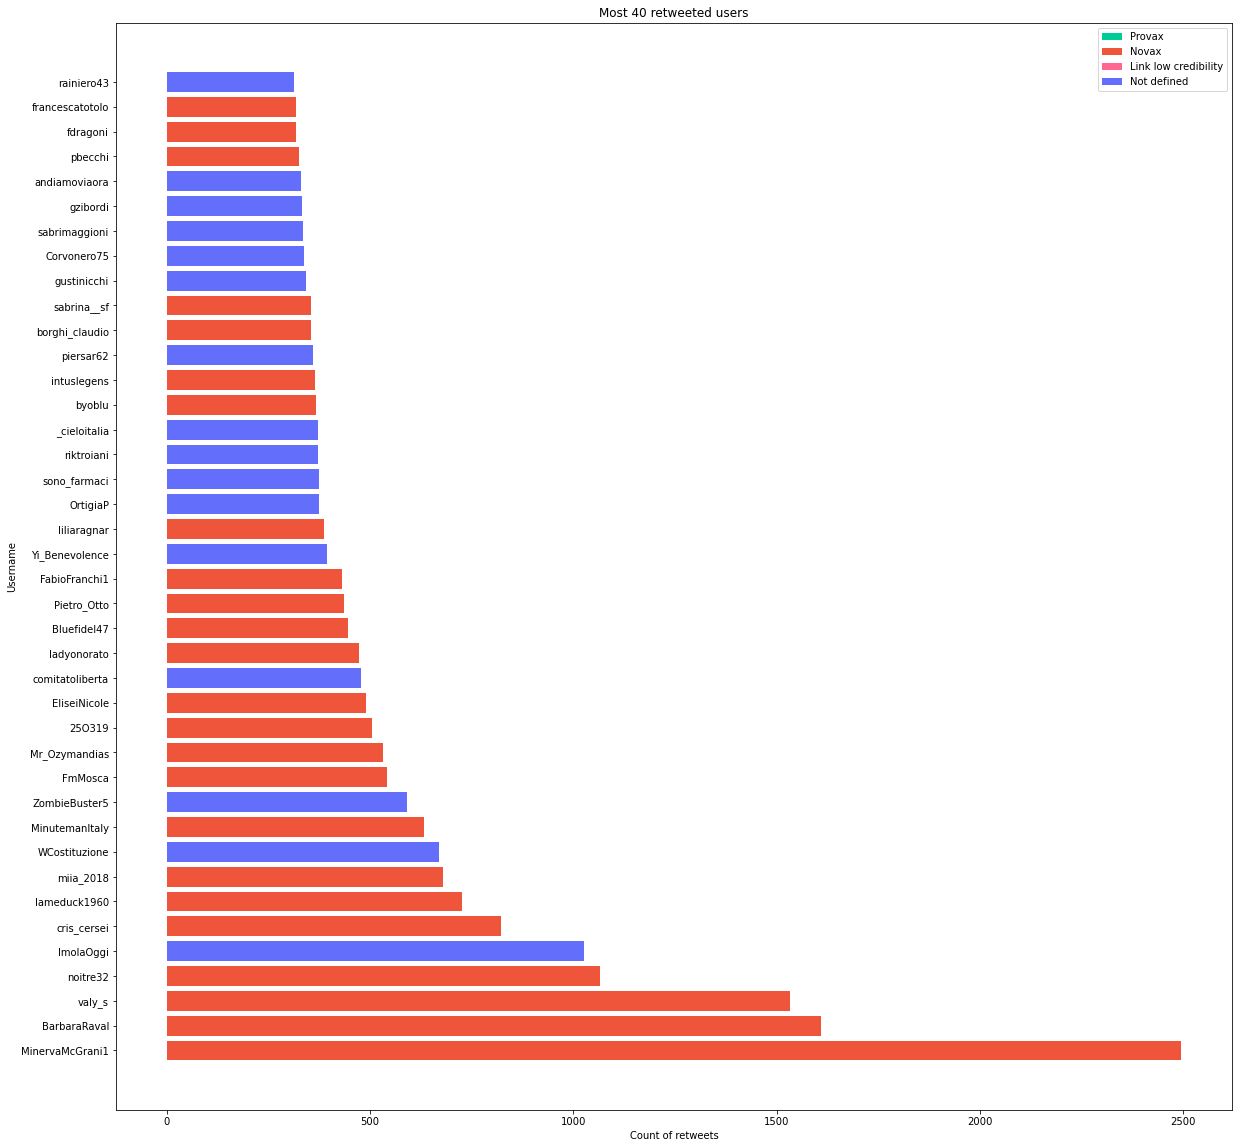

In [23]:
ut.print_histogram_users(df_retweet_novax,40,'real_rt','Most %d retweeted users (novaz)'%40,'Count of retweets')

In [24]:
df_retweet_provax = pd.DataFrame()
df_retweet_provax['all_rt']  = retweet_provax.groupby('rt_user_screen_name').count()['user_id']
df_retweet_provax['self_rt'] = retweet_provax.groupby('rt_user_screen_name').sum()['is_self_rt']
df_retweet_provax['real_rt'] = df_retweet_provax['all_rt'] - df_retweet_novax['self_rt']
df_retweet_provax.sort_values('real_rt',ascending=False,inplace=True)

df_retweet_provax = ut.add_user_type(df_retweet_provax,listNovax,listProvax,listLinkLow)
df_retweet_provax

,all_rt,self_rt,real_rt,user_type
rt_user_screen_name,,,,
Cartabellotta,446,263,446.0,Provax
robersperanza,25,0,25.0,Provax
RobertoBurioni,18,0,18.0,Provax
La7tv,15,0,15.0,Not defined
Aifa_ufficiale,13,0,13.0,Provax
...,...,...,...,...
signorellicarlo,1,0,NaN,Not defined
szampa56,1,0,NaN,Not defined
vitaindiretta,1,0,NaN,Not defined


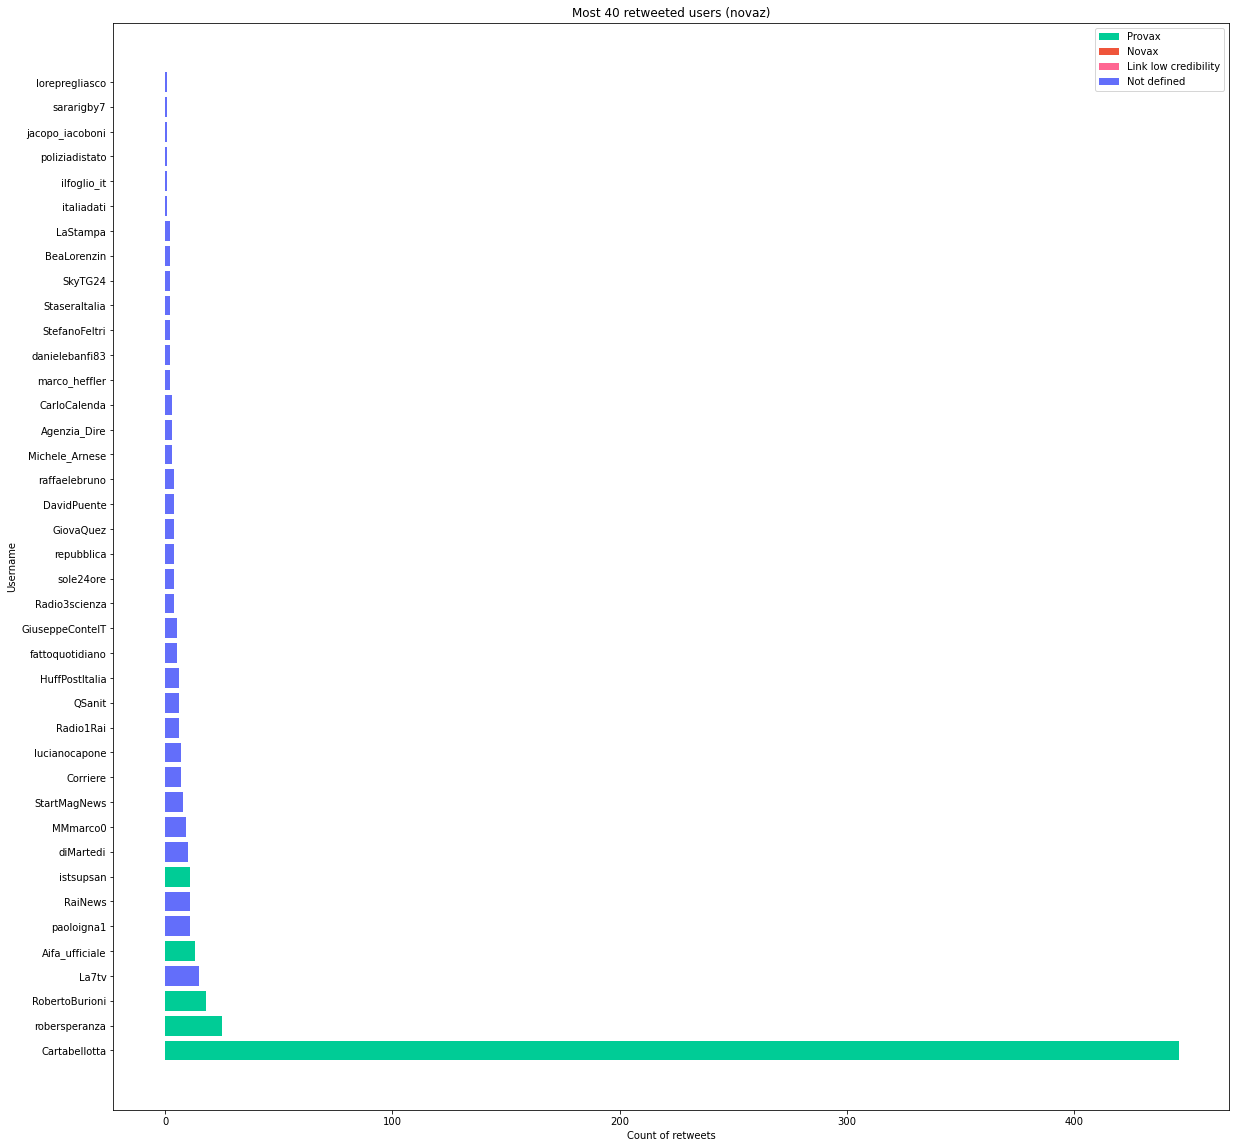

In [25]:
ut.print_histogram_users(df_retweet_provax,40,'real_rt','Most %d retweeted users (provax)'%40,'Count of retweets')

#### Reply study

C:\Users\giada\Documents\Bachelor\0_Tweetstudy\repo\7.0_Generation_0_study\../2_Account_study\account_util.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfReturn[name_col] = 1


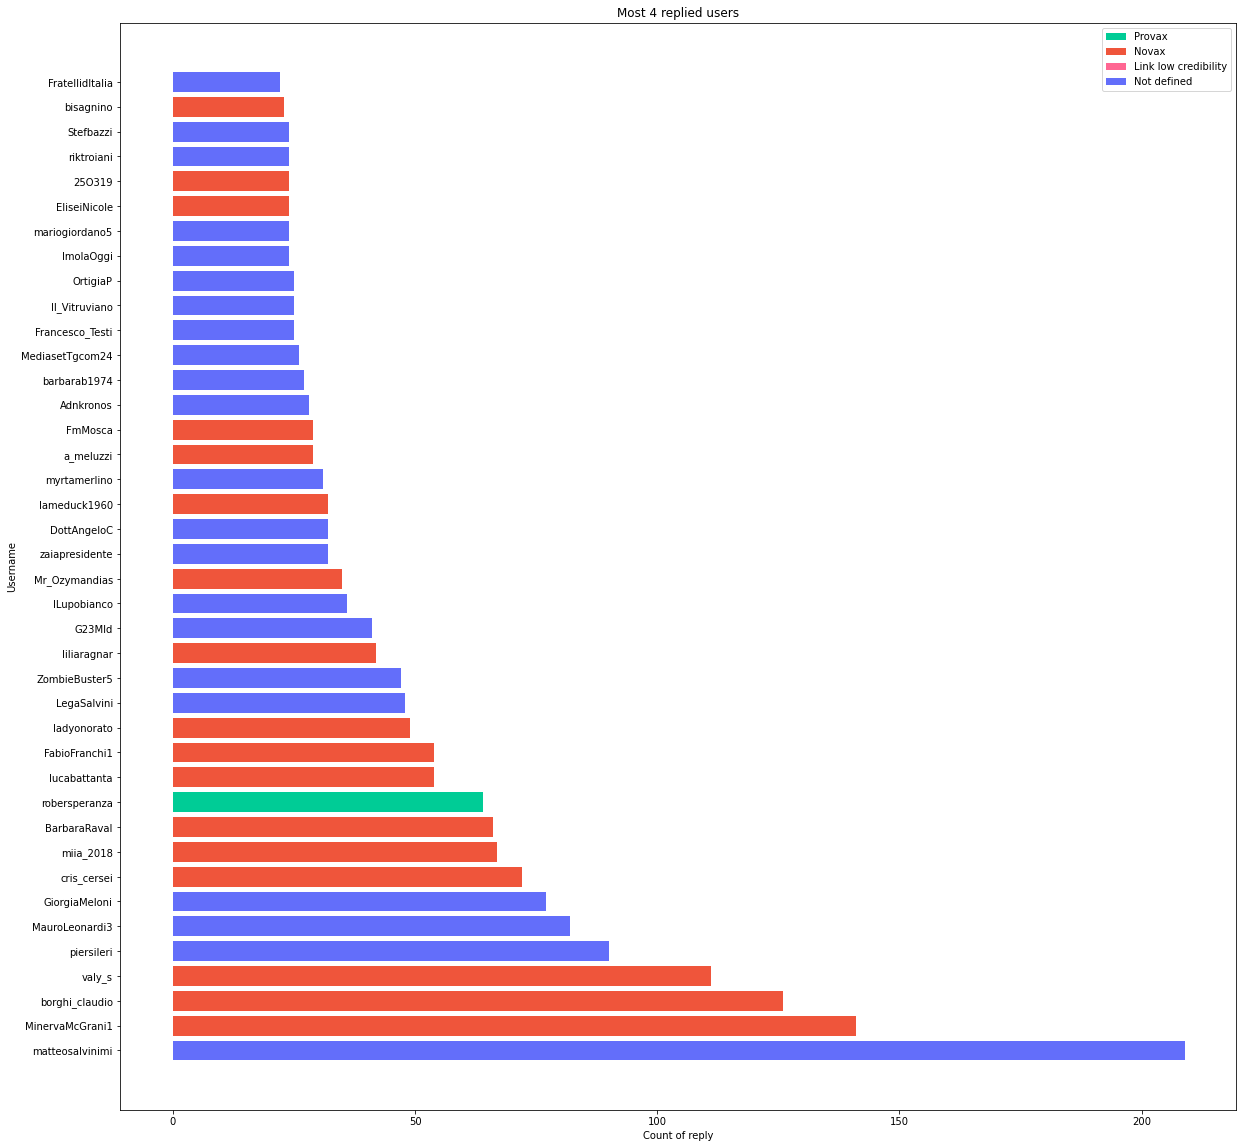

In [26]:
df_replied_novax = ut.get_df_raggruped(reply_novax,'reply','in_reply_to_screen_name')
df_replied_novax = ut.add_user_type(df_replied_novax,listNovax,listProvax,listLinkLow)[['reply','user_type']]

ut.print_histogram_users(df_replied_novax,40,'reply','Most %d replied users'%40,'Count of reply')

#### Quote study

C:\Users\giada\Documents\Bachelor\0_Tweetstudy\repo\7.0_Generation_0_study\../2_Account_study\account_util.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfReturn[name_col] = 1


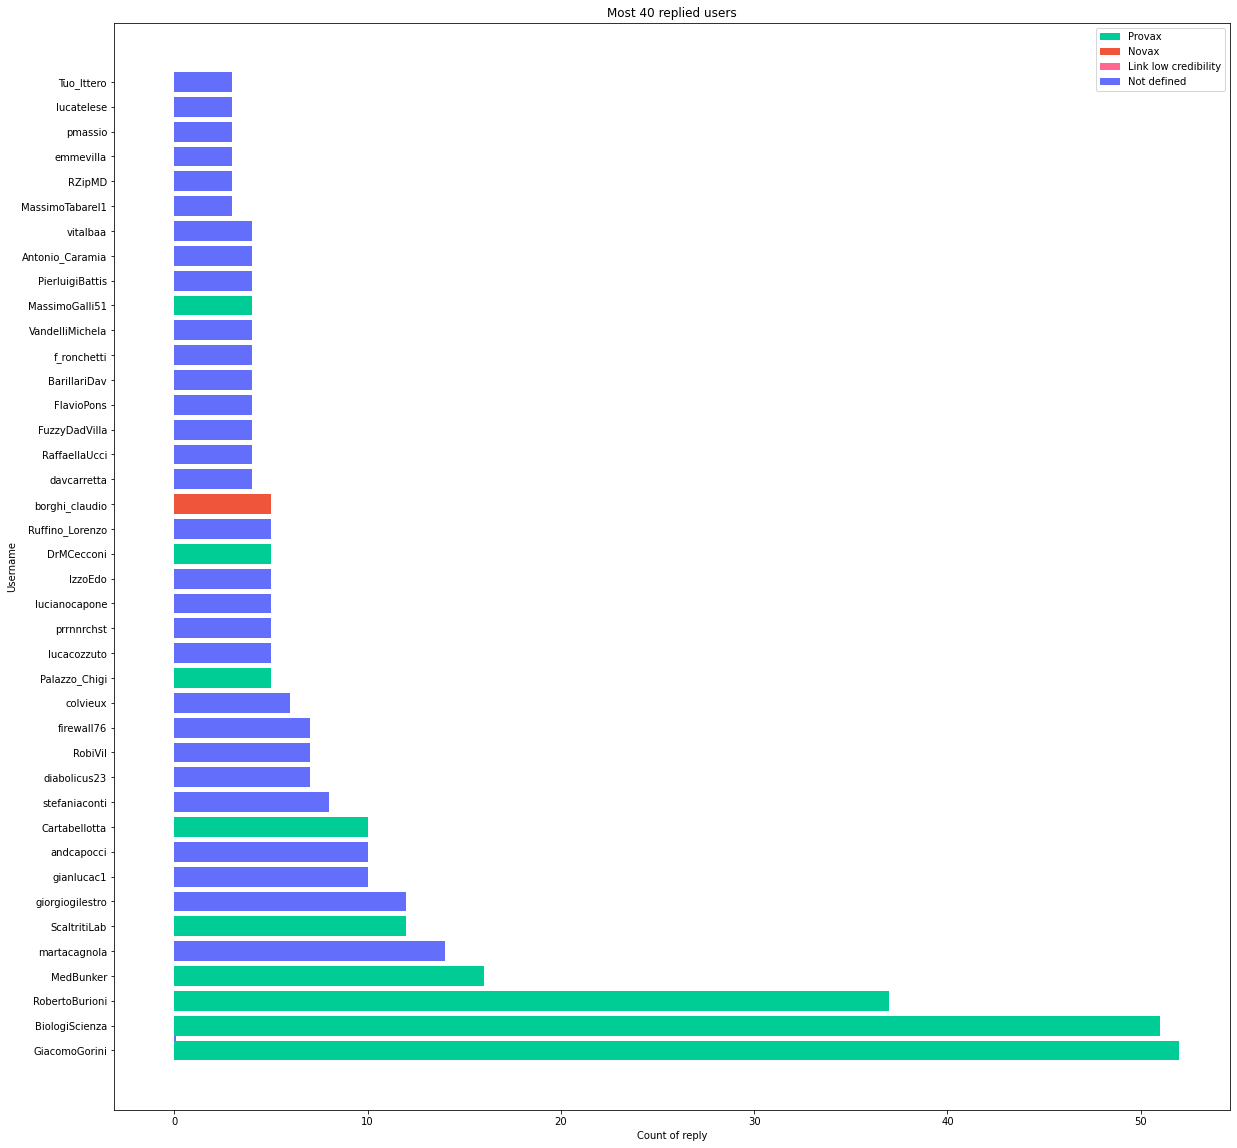

In [27]:
df_replied_provax = ut.get_df_raggruped(reply_provax,'reply','in_reply_to_screen_name')
df_replied_provax = ut.add_user_type(df_replied_provax,listNovax,listProvax,listLinkLow)[['reply','user_type']]

ut.print_histogram_users(df_replied_provax,40,'reply','Most %d replied users'%40,'Count of reply')

C:\Users\giada\Documents\Bachelor\0_Tweetstudy\repo\7.0_Generation_0_study\../2_Account_study\account_util.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfReturn[name_col] = 1


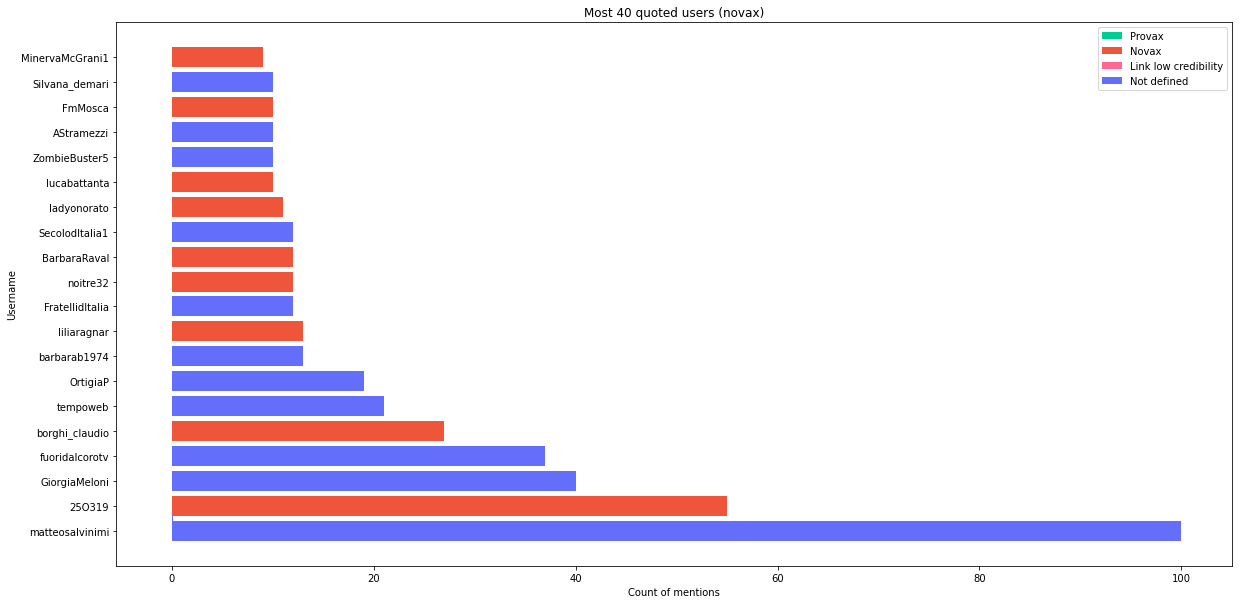

In [32]:
df_quotes_novax = ut.get_df_raggruped(quotes_novax,'quotes_count','in_reply_to_screen_name')
df_quotes_novax = ut.add_user_type(df_quotes_novax,listNovax,listProvax,listLinkLow)[['quotes_count','user_type']]

ut.print_histogram_users(df_quotes_novax,20,'quotes_count','Most %d quoted users (novax)'%40,'Count of mentions')

C:\Users\giada\Documents\Bachelor\0_Tweetstudy\repo\7.0_Generation_0_study\../2_Account_study\account_util.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfReturn[name_col] = 1


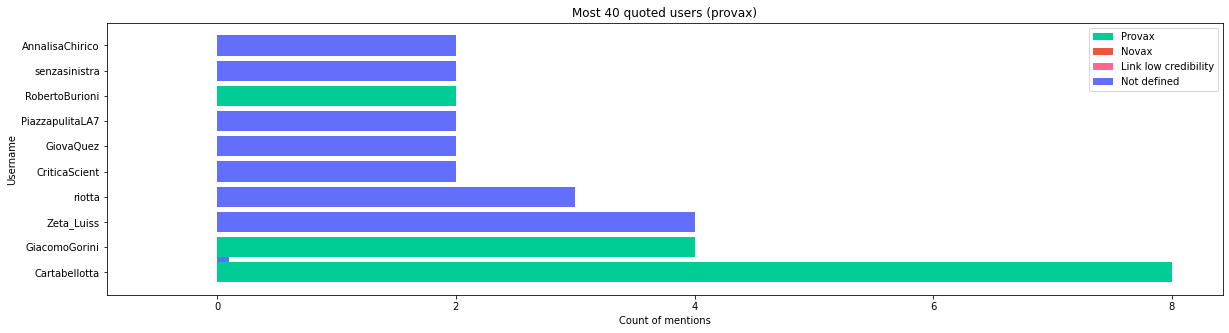

In [30]:
df_quotes_provax = ut.get_df_raggruped(quotes_provax,'quotes_count','in_reply_to_screen_name')
df_quotes_provax = ut.add_user_type(df_quotes_provax,listNovax,listProvax,listLinkLow)[['quotes_count','user_type']]

ut.print_histogram_users(df_quotes_provax,10,'quotes_count','Most %d quoted users (provax)'%10,'Count of mentions')

### Tweets distrubution

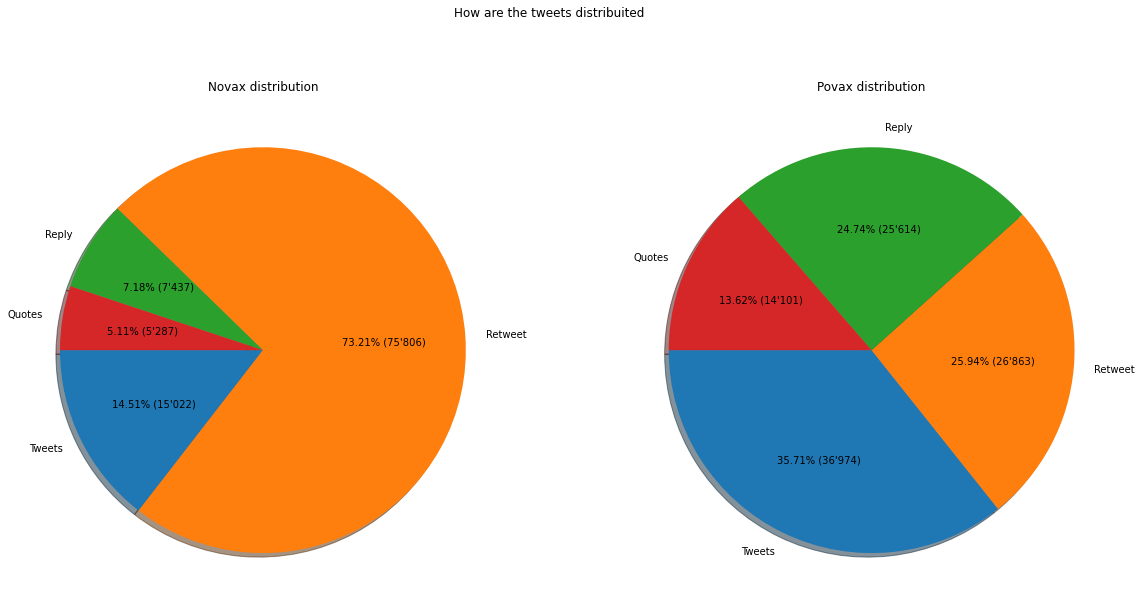

("Total posts novax: 103'552", "Total posts provax: 3'400")

In [48]:
values_novax = [len(tweets_novax),len(retweet_novax),len(reply_novax),len(quotes_novax)]
values_provax = [len(tweets_provax),len(retweet_provax),len(reply_provax),len(quotes_provax)]
names = ['Tweets', 'Retweet','Reply','Quotes']

fig1, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.pie(values_novax, labels=names, autopct=lambda p:f'{p:.2f}% ({p*sum(values)/100 :,.0f})'.replace(',', '\''),
        shadow=True, startangle=180)
ax1.set_title('Novax distribution')
ax2.pie(values_provax, labels=names, autopct=lambda p:f'{p:.2f}% ({p*sum(values)/100 :,.0f})'.replace(',', '\''),
        shadow=True, startangle=180)
fig1.suptitle('How are the tweets distribuited')
ax2.set_title('Povax distribution')


plt.show()
"Total posts novax: {:,}".format(len(df_novax)).replace(',', '\''),\
"Total posts provax: {:,}".format(len(df_provax)).replace(',', '\'')

# User credibility (based on url shared)

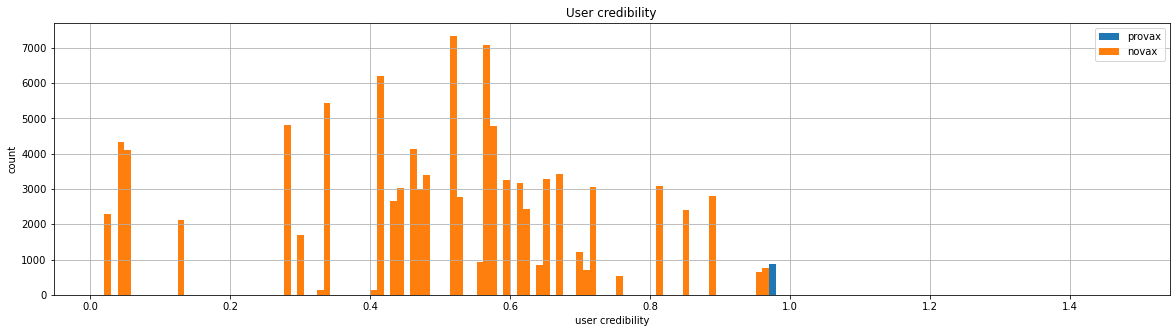

In [15]:
plt.figure(figsize=(20,5))

df1 = df_provax[df_provax['user_url_cred'].notna()]
user_credibility = df1.loc[df1['user_url_cred']<1,'user_url_cred']
user_credibility = user_credibility[user_credibility > 0]
user_credibility.hist(bins=100,label="provax")

df1 = df_novax[df_novax['user_url_cred'].notna()]
user_credibility = df1.loc[df1['user_url_cred']<1,'user_url_cred']
user_credibility = user_credibility[user_credibility > 0]
user_credibility.hist(bins=100,label="novax")

plt.xlabel('user credibility')
plt.ylabel('count')
plt.title('User credibility')
plt.legend()
plt.show()